# FIPY Script to solve 1D heat/diffusion equation

### Importing All necessary modules from FIPy

In [8]:
from fipy import * #imports all fipy modules
from scipy.special import erf
from fipy.tools import numerix

### Defining the grid mesh to hold Cell Variables

In [9]:
mesh = Grid1D(nx = 50.0, dx = 1.0) #creating a mesh to hold a 1d solution set
phi = CellVariable(name="Solution Variable", mesh=mesh,value=0.0) #sets the variable phi that will contain the solution set
phiAnalytical = CellVariable(name="Ananlytical Value", mesh=mesh) #sets the analytical value, to measure accuracy of solution variable
print(phi)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


### Placing constraints on the Phi variable as seen below

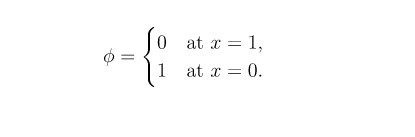

In [15]:
val_Left = 1 #Value for left boundary condition
val_Right = 0 #Value for right boundary condition
dx = 1
D = 1

#Setting the boundary conditions below
phi.constrain(val_Left, mesh.facesLeft)
phi.constrain(val_Right, mesh.facesRight)

#Representation of Equation using modules import from the fipy Object
diffusionEquation = TransientTerm() == ExplicitDiffusionTerm(coeff=D)

timeStepDuration = 0.9 * ( dx**2/(2*D) ) #The largest stable timestep that can be taken, limit steps to 90%
steps = 100

### Defining the analytical solution of the 1D PDE

In [16]:
x = mesh.cellCenters[0]
t = timeStepDuration*steps

phiAnalytical.setValue(1 - erf(x / (2 * numerix.sqrt(D * t))))  #generates analytical equation

### Creating View Object for plotting

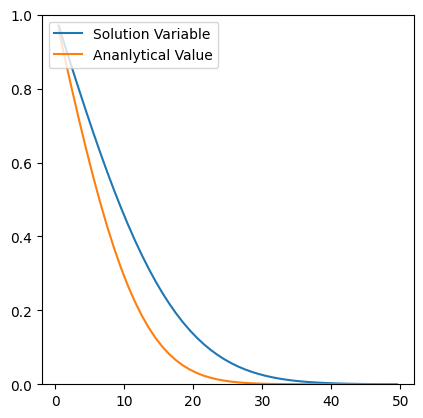

In [17]:
view = Viewer(vars=(phi,phiAnalytical), datamin=0.0, datamax=1.0)

### Running a for loop to solve the eqution for different range of steps

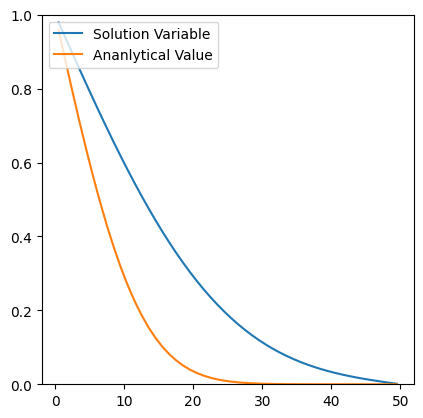

[0.97898627 0.937017   0.89522182 0.85371519 0.81260918 0.7720126
 0.73203009 0.69276134 0.65430037 0.61673482 0.5801454  0.54460541
 0.5101803  0.4769274  0.4448957  0.41412575 0.38464963 0.35649105
 0.32966548 0.30418043 0.28003574 0.25722396 0.23573082 0.21553567
 0.19661202 0.17892809 0.16244737 0.14712921 0.13292937 0.1198006
 0.10769319 0.09655548 0.08633437 0.07697578 0.06842506 0.06062735
 0.05352795 0.04707258 0.04120761 0.03588025 0.03103867 0.02663213
 0.02261099 0.01892672 0.01553189 0.01238006 0.00942572 0.00662411
 0.00393115 0.00130317]


In [19]:
for step in range(steps): #loop to generates solution set of pde
    diffusionEquation.solve(var=phi, dt=timeStepDuration)

view.plot()
print(phi)